x[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/menyifang/DCT-Net/blob/main/notebooks/inference.ipynb)

## Step 1: Installation

In [ ]:
!pip install numpy==1.18.5
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install --upgrade tensorflow-gpu==1.15 # GPU support, use tensorflow for CPU only
!pip install "modelscope[cv]==1.3.0" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
!pip install "modelscope[multi-modal]==1.3.0" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html

## Step 2: Data preparation

style-pretrained diffusion model can be used to produce raw style data (celebrity name -> image)

In [ ]:
import cv2
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

pipe = pipeline(Tasks.text_to_image_synthesis, model='damo/cv_cartoon_stable_diffusion_clipart', model_revision='v1.0.0')
from diffusers.schedulers import EulerAncestralDiscreteScheduler
pipe.pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.pipeline.scheduler.config)
output = pipe({'text': 'archer style, a portrait painting of Johnny Depp'})
cv2.imwrite('result.png', output['output_imgs'][0])
print('Image saved to result.png')

print('finished!')

## Step 3: Training

fast training of local texture translator with diverse training data:

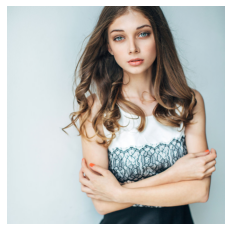

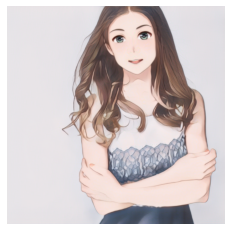

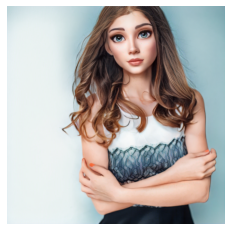

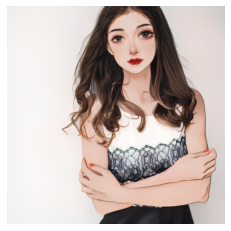

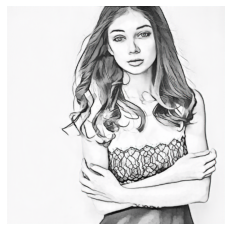

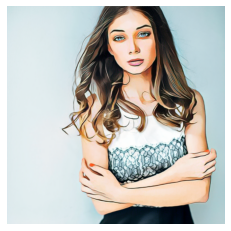

In [21]:
import os
import unittest
import cv2
from modelscope.exporters.cv import CartoonTranslationExporter
from modelscope.msdatasets import MsDataset
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.pipelines.base import Pipeline
from modelscope.trainers.cv import CartoonTranslationTrainer
from modelscope.utils.constant import Tasks
from modelscope.utils.test_utils import test_level

model_id = 'damo/cv_unet_person-image-cartoon_compound-models'
data_dir = MsDataset.load(
            'dctnet_train_clipart_mini_ms',
            namespace='menyifang',
            split='train').config_kwargs['split_config']['train']

# replace data_dir with your own training data
data_photo = os.path.join(data_dir, 'face_photo')
data_cartoon = os.path.join(data_dir, 'face_cartoon')
work_dir = 'exp_localtoon'
# recomand 30000 steps for real training
max_steps = 10
trainer = CartoonTranslationTrainer(
            model=model_id,
            work_dir=work_dir,
            photo=data_photo,
            cartoon=data_cartoon,
            max_steps=max_steps)
trainer.train()
